In [2]:
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import KFold
import tensorflow as tf
#Function import
from ipynb.fs.full.autoXRD import normdata
from ipynb.fs.full.autoXRD import normdatasingle
from ipynb.fs.full.autoXRD import augdata
from ipynb.fs.full.autoXRD import exp_augdata
from ipynb.fs.full.autoXRD import exp_data_processing

#Variou import
import pandas as pd
import numpy as np  
from scipy.signal import savgol_filter
from scipy.signal import find_peaks_cwt

(4249, 24)
(4249, 12)


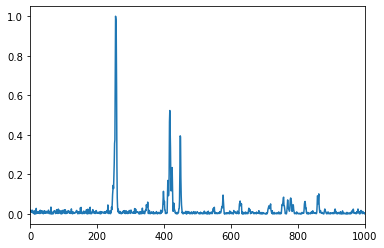

In [6]:
#Load experimental data as dataframe
exp = pd.read_csv('Datasets/exp2_raw.csv', index_col=0)
exp_arr = exp.values
print(exp_arr.shape)

nexp = normdata(exp_arr)
print(nexp.shape)

for i in range(0, 1):
    plt.plot(nexp[:,i])
    plt.xlim(0, 1000)
    plt.show()

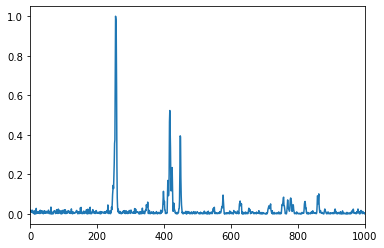

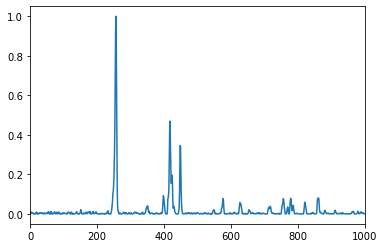

In [19]:
window = 20
exp_min = 0
exp_max = 4000
# Preprocess experimental data
post_exp = normdatasingle(exp_data_processing(nexp, exp_min, exp_max, window))
for i in range(0, 1):
    plt.plot(nexp[:,i])
    plt.xlim(0, 1000)
    plt.show()
    plt.plot(post_exp[:,i])
    plt.xlim(0, 1000)
    plt.show()

In [38]:
#augmentation de postexp
#def exp_augdata(data,num,label):
data = post_exp
num = 500

# Load experimental class labels
label_exp= pd.read_csv(('Datasets/label_exp2.csv'), index_col=0).values
label_exp = label_exp.reshape([len(label_exp),])
print(label_exp.shape)

# exp_augdata(data,num,label):
(len1,w1) = np.shape(data)
augd =np.zeros([len1,num])
naugd=np.zeros([len1,num])
newaugd=np.zeros([len1,num])
par = []
# Ascribe random dimentionality
#par=np.zeros([num,])
#print(par.shape)

for i in range(num):
    rnd = np.random.randint(0,w1)

    # create the first filter for peak elimination
    dumb= np.repeat(np.random.choice([0,1,1],300),len1//300)
    dumb1= np.append(dumb,np.zeros([len1-len(dumb),]))
    # create the second filter for peak scaling
    dumbrnd= np.repeat(np.random.rand(200,),len1//200)
    dumbrnd1=np.append(dumbrnd,np.zeros([len1-len(dumbrnd),]))
    #peak eleminsation and scaling
    augd[:,i] = np.multiply((data[:,rnd]),dumbrnd1)
    augd[:,i] = np.multiply(augd[:,i],dumb1)
    #normalization
    naugd[:,i] = (augd[:,i]-min(augd[:,i]))/(max(augd[:,i])-min(augd[:,i])+1e-9)
    par.append(label_exp[rnd])
    # Ascribe random dimentionality
    #par[i,] = label_exp[rnd,] 
    #adding shift
    cut = np.random.randint(-20*1,20)
    #XRD spectrum shift to left
    if cut>=0:
        newaugd[:,i] = np.append(naugd[cut:,i],np.zeros([cut,]))
    #XRD spectrum shift to right
    else:
        newaugd[:,i] = np.append(naugd[0:len1+cut,i],np.zeros([cut*-1,]))

print(newaugd.shape)
print(par)

(12,)
(4000, 500)
[1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 3, 1, 3, 3, 1, 1, 2, 3, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 2, 3, 3, 1, 3, 1, 3, 3, 1, 1, 3, 3, 2, 1, 3, 1, 1, 1, 3, 3, 1, 3, 2, 1, 1, 1, 3, 3, 1, 1, 3, 2, 1, 3, 1, 1, 2, 1, 2, 2, 1, 3, 3, 1, 1, 3, 1, 3, 2, 1, 1, 1, 1, 3, 3, 2, 1, 2, 1, 2, 2, 2, 2, 1, 3, 2, 1, 1, 2, 1, 3, 3, 3, 1, 3, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 3, 1, 3, 1, 3, 3, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 2, 3, 1, 1, 1, 1, 2, 1, 1, 2, 2, 3, 1, 3, 1, 1, 2, 2, 1, 1, 3, 1, 3, 1, 1, 1, 2, 1, 1, 1, 2, 2, 3, 3, 2, 3, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 3, 1, 1, 3, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 2, 3, 2, 1, 1, 3, 2, 1, 2, 1, 1, 3, 1, 1, 1, 3, 2, 2, 1, 3, 3, 1, 2, 2, 1, 2, 1, 1, 3, 3, 2, 3, 1, 1, 2, 1, 1, 2, 2, 2, 1, 3, 2, 2, 2, 3, 2, 1, 3, 2, 1, 3, 1, 1, 1, 3, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 3, 1, 1, 1, 2, 2, 3, 1, 1, 1, 2, 2, 1, 2, 1, 3, 2, 3, 1, 2, 1, 1, 2, 1, 2, 2, 1, 

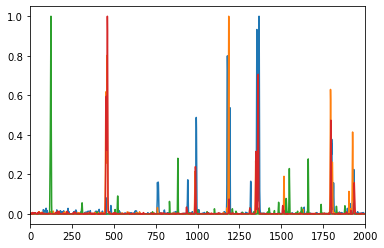

In [48]:

plt.plot(newaugd[:,1])
plt.plot(newaugd[:,2])
plt.plot(newaugd[:,4])
plt.plot(newaugd[:,8])
plt.xlim(0, 2000)
plt.show()